# Decision Tree 
* Decision tree is a supervised machine learning technique that can be used for both Classification and Regression problems, but mostly it is preferred for solving Classification problems.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
>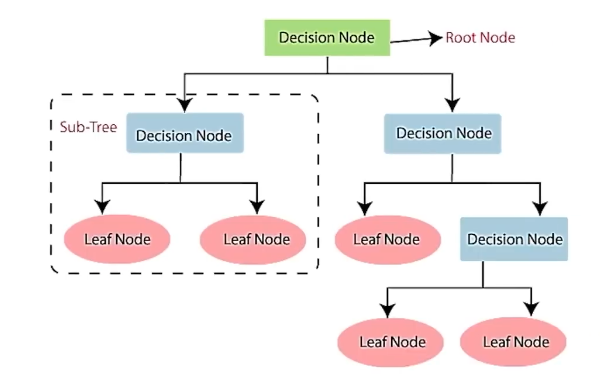
### Important terminology related to decision tree
* **Root Node**: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
* **Splitting**: It is a process of dividing a node into two or more sub-nodes.
* **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision nodes.
* **Leaf/Terminal Node**: Nodes do not split is called Leaf or Terminal nodes.
* **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. you can the opposite process of splitting.
* **Branch/Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.
* **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.
### Attribute Selection Measures
* This measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:
    * Information Gain
    * Entropy/Gini Index
### Entropy
* Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data.
> 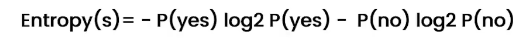
* Where:
    * s = Total number of samples
    * P(yes) = probablity of yes
    * P(no) = probablity of no
### Gini index
* Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
* An attribute with the low Gini index should be prefarred as compared to the high Gini index
>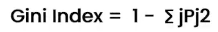
### Information Gain
* Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. It calculates how much information a feature provides us about a class.
>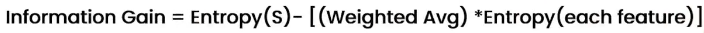


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('../../dataset/Social_Network_Ads.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
df.drop(columns=['User ID','Gender'],inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [43]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(33)

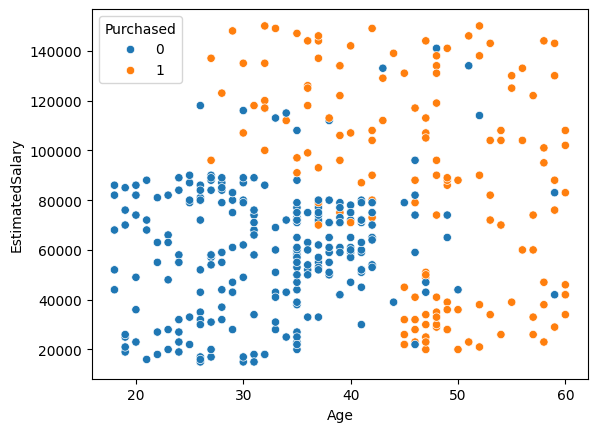

In [68]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Purchased'])
plt.show()

In [45]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [46]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
dt.score(x_train,y_train), dt.score(x_test,y_test)

(0.9966666666666667, 0.82)

In [51]:
dt.predict(ss.transform([[47,30000]]))

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#### Graphical analysis of the decision tree algorithm

In [52]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig('decision_tree_graph.jpg')
plt.show()

SyntaxError: incomplete input (653217386.py, line 4)

In [70]:
from mlxtend.plotting import plot_decision_regions

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


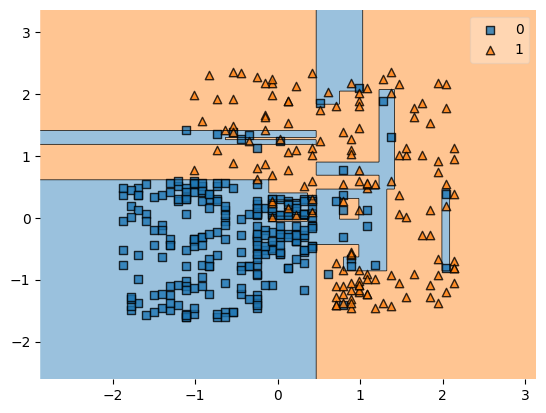

In [74]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [65]:
dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train,y_train)
dt2.score(x_train,y_train),dt2.score(x_test,y_test)

(0.9966666666666667, 0.84)

In [67]:
dt2.predict(ss.transform([[45,22000]]))

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])